In [1]:
!pip install prophet

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.5 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.3 MB 1.4 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/13.3 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/13.3 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/13.3 MB 1.3 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/13.3 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/13.3 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/13.3 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/13.3 MB 1.3 MB/s eta 0:00:09
   -------- ------------------------------- 2.9/13.3 MB 1.2 MB/s eta 0:00:09
   --------- -------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\7420\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\7420\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('../../data/mock-metrics/2.csv', sep=";")

In [8]:
df.head()

,Unnamed: 0,Timestamp,Request Count,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,0,2024-01-01 00:00:00,269,4,12000,2694.792537,22.456604,1.398101e+06,366222.775270,1332.776078,788.259936,2172.292688,1849.655421
1,1,2024-01-01 00:00:01,257,4,12000,2628.549140,21.904576,1.398101e+06,339206.611007,1329.878660,761.568959,2024.144533,1809.571828
2,2,2024-01-01 00:00:02,272,4,12000,2763.982417,23.033187,1.398101e+06,489335.436237,1393.768534,857.728798,2150.100457,1896.945832
3,3,2024-01-01 00:00:03,290,4,12000,2902.261901,24.185516,1.398101e+06,607617.927736,1522.963019,901.413034,2350.029500,2061.806099
4,4,2024-01-01 00:00:04,255,4,12000,2492.321428,20.769345,1.398101e+06,602676.457874,1210.904445,759.198035,2033.722685,1815.487839


In [10]:
df_cpu_usage = df.loc[:3600 * 24 * 7, ['Timestamp', 'CPU usage [%]']]

In [11]:
df_cpu_usage.rename(columns={'Timestamp': 'ds', 'CPU usage [%]': 'y'}, inplace=True)

In [12]:
df_cpu_usage.tail()

,ds,y
604795,2024-01-07 23:59:55,12.287838
604796,2024-01-07 23:59:56,10.503017
604797,2024-01-07 23:59:57,11.817892
604798,2024-01-07 23:59:58,8.403274
604799,2024-01-07 23:59:59,9.712158


In [13]:
model = Prophet()
model.fit(df_cpu_usage)

01:09:24 - cmdstanpy - INFO - Chain [1] start processing
01:17:35 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=60 * 24, freq='T')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\7420\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1872: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
606235,2024-01-08 23:55:59,-12.502507,-189.775392,178.808902
606236,2024-01-08 23:56:59,-12.523764,-186.622347,183.957594
606237,2024-01-08 23:57:59,-12.543579,-188.544133,179.700728
606238,2024-01-08 23:58:59,-12.561956,-191.332899,183.142343
606239,2024-01-08 23:59:59,-12.578901,-188.172248,179.178879


In [8]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
129596,2024-01-02 11:59:56,-25.668872,-176.401107,131.330858,-177.122714,129.891400,0.0,0.0,0.0,0.0,0.0,0.0,-25.668872
129597,2024-01-02 11:59:57,-25.669875,-175.543257,130.896269,-177.129932,129.897661,0.0,0.0,0.0,0.0,0.0,0.0,-25.669875
129598,2024-01-02 11:59:58,-25.670877,-177.071282,130.736419,-177.137149,129.903921,0.0,0.0,0.0,0.0,0.0,0.0,-25.670877
129599,2024-01-02 11:59:59,-25.671879,-177.258198,131.492996,-177.144367,129.910182,0.0,0.0,0.0,0.0,0.0,0.0,-25.671879
129600,2024-01-02 12:00:00,-25.672881,-176.762933,130.426124,-177.151585,129.916442,0.0,0.0,0.0,0.0,0.0,0.0,-25.672881


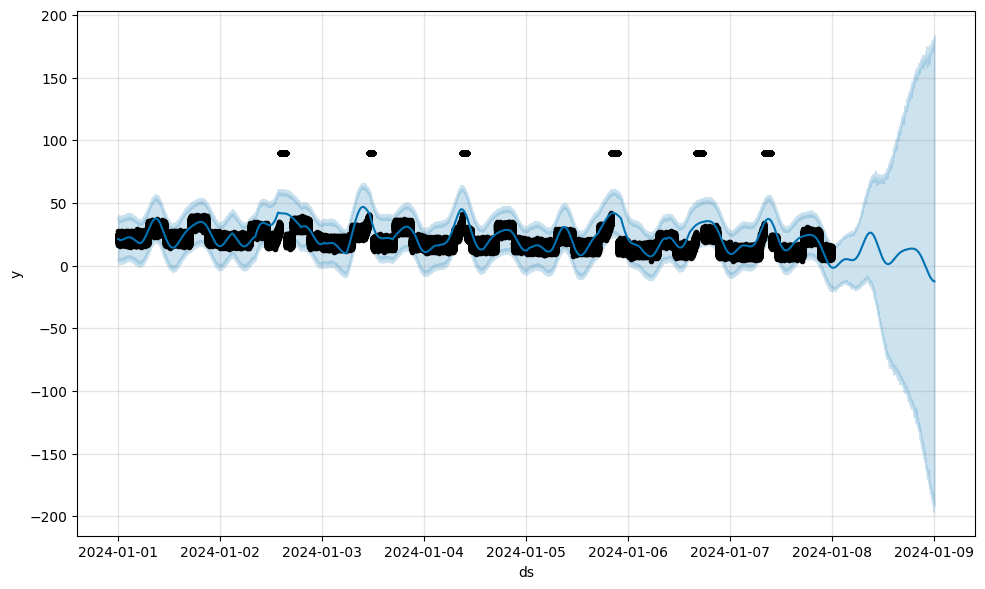

In [16]:
fig1 = model.plot(forecast)